<a href="https://colab.research.google.com/github/vard-uhi/Internship/blob/main/Task2_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 2**

*Data: Historical Data of the different Footbal Leaguas*

*Task: Choose a LEAGUE you prefer and solve the following problems*

*   Calculate average number of goals for home and away teams per
SEASON for that league and sort them descending order,Which clubs are
more consistent ?
*   Construct a plot to show how this number is changing over time.
Hint:
SEASON on x-axis. Show average Home goals and Away goals on the
same plot. Be sure that your plot has appropriate axis names and titles.
*   Find following clubs for each season: the best attack (top 5), the best defense (top5)



In [1]:
#import libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns #visualization
sns.set()
import numpy as np 

In [2]:
#load the data
from google.colab import files
data_to_load = files.upload()

Saving data.csv to data.csv


In [3]:
import io
# .read_csv() assigns the information from the initial *.csv file to this variable
raw_data = pd.read_csv(io.BytesIO(data_to_load['data.csv']))

**Checking the content of the dataset**

In [4]:
#copying data
df = raw_data.copy()

In [5]:
df.head()

,SEASON,COUNTRY,LEAGUE,DATE,HOMETEAM,AWAYTEAM,FTSC,FTR,FTHG,FTAG,FTTG,H,D,A
0,1994.0,England,Premier League,1993-08-14,Arsenal,Coventry,0-3,A,0.0,3.0,3.0,NaN,NaN,NaN
1,1994.0,England,Premier League,1993-08-14,Aston Villa,QPR,4-1,H,4.0,1.0,5.0,NaN,NaN,NaN
2,1994.0,England,Premier League,1993-08-14,Chelsea,Blackburn,1-2,A,1.0,2.0,3.0,NaN,NaN,NaN
3,1994.0,England,Premier League,1993-08-14,Liverpool,Sheffield Weds,2-0,H,2.0,0.0,2.0,NaN,NaN,NaN
4,1994.0,England,Premier League,1993-08-14,Man City,Leeds,1-1,D,1.0,1.0,2.0,NaN,NaN,NaN


In [6]:
df['LEAGUE'].unique()

array(['Premier League', 'Bundesliga 1', 'La Liga Primera Division',
       'Serie A', 'Le Championnat', 'Eredivisie', 'Liga I',
       'Futbol Ligi 1', 'Ethniki Katigoria', 'Jupiler League'],
      dtype=object)

I will choose 'La Liga Primera Division' as an object for furthur analysis.

**Exploratory Data Analysis of the "La Liga Primera Division"**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87816 entries, 0 to 87815
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEASON    87816 non-null  float64
 1   COUNTRY   87816 non-null  object 
 2   LEAGUE    87816 non-null  object 
 3   DATE      87816 non-null  object 
 4   HOMETEAM  87816 non-null  object 
 5   AWAYTEAM  87816 non-null  object 
 6   FTSC      87816 non-null  object 
 7   FTR       87814 non-null  object 
 8   FTHG      87814 non-null  float64
 9   FTAG      87814 non-null  float64
 10  FTTG      87814 non-null  float64
 11  H         57660 non-null  float64
 12  D         57660 non-null  float64
 13  A         57660 non-null  float64
dtypes: float64(7), object(7)
memory usage: 9.4+ MB


In [8]:
#changing datatype of the season from float to integer
df.SEASON = df.SEASON.astype(int)

In [9]:
type(df['SEASON'][0])

numpy.int64

In [10]:
df.loc[df['LEAGUE'].isin(['La Liga Primera Division'])].count()

SEASON      10044
COUNTRY     10044
LEAGUE      10044
DATE        10044
HOMETEAM    10044
AWAYTEAM    10044
FTSC        10044
FTR         10044
FTHG        10044
FTAG        10044
FTTG        10044
H            6454
D            6454
A            6454
dtype: int64

In [11]:
df_new = df[df.LEAGUE == 'La Liga Primera Division']

In [12]:
#to see dataset's first few rows
df_new.head()

,SEASON,COUNTRY,LEAGUE,DATE,HOMETEAM,AWAYTEAM,FTSC,FTR,FTHG,FTAG,FTTG,H,D,A
768,1994,Spain,La Liga Primera Division,1993-09-05,Ath Bilbao,Albacete,4-1,H,4.0,1.0,5.0,NaN,NaN,NaN
769,1994,Spain,La Liga Primera Division,1993-09-05,Ath Madrid,Logrones,1-0,H,1.0,0.0,1.0,NaN,NaN,NaN
770,1994,Spain,La Liga Primera Division,1993-09-05,Barcelona,Sociedad,3-0,H,3.0,0.0,3.0,NaN,NaN,NaN
771,1994,Spain,La Liga Primera Division,1993-09-05,La Coruna,Celta,0-0,D,0.0,0.0,0.0,NaN,NaN,NaN
772,1994,Spain,La Liga Primera Division,1993-09-05,Osasuna,Real Madrid,1-4,A,1.0,4.0,5.0,NaN,NaN,NaN


In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10044 entries, 768 to 85657
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEASON    10044 non-null  int64  
 1   COUNTRY   10044 non-null  object 
 2   LEAGUE    10044 non-null  object 
 3   DATE      10044 non-null  object 
 4   HOMETEAM  10044 non-null  object 
 5   AWAYTEAM  10044 non-null  object 
 6   FTSC      10044 non-null  object 
 7   FTR       10044 non-null  object 
 8   FTHG      10044 non-null  float64
 9   FTAG      10044 non-null  float64
 10  FTTG      10044 non-null  float64
 11  H         6454 non-null   float64
 12  D         6454 non-null   float64
 13  A         6454 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 1.1+ MB


In [14]:
#reset index
df_new = df_new.reset_index(drop=True)

In [15]:
df_new.head()

,SEASON,COUNTRY,LEAGUE,DATE,HOMETEAM,AWAYTEAM,FTSC,FTR,FTHG,FTAG,FTTG,H,D,A
0,1994,Spain,La Liga Primera Division,1993-09-05,Ath Bilbao,Albacete,4-1,H,4.0,1.0,5.0,NaN,NaN,NaN
1,1994,Spain,La Liga Primera Division,1993-09-05,Ath Madrid,Logrones,1-0,H,1.0,0.0,1.0,NaN,NaN,NaN
2,1994,Spain,La Liga Primera Division,1993-09-05,Barcelona,Sociedad,3-0,H,3.0,0.0,3.0,NaN,NaN,NaN
3,1994,Spain,La Liga Primera Division,1993-09-05,La Coruna,Celta,0-0,D,0.0,0.0,0.0,NaN,NaN,NaN
4,1994,Spain,La Liga Primera Division,1993-09-05,Osasuna,Real Madrid,1-4,A,1.0,4.0,5.0,NaN,NaN,NaN


In [16]:
df_new['SEASON'].unique()

array([1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019])

####Calculate average number of goals for home and away teams per SEASON for that league and sort them descending order,Which clubs are more consistent ?

Abbreviations:

* FTSC = Full Time Score
* FTR = Full Time Result  
* FTHG = Full Time Home Team Goals	
* FTAG = Full Time Away Team Goals
* FTTG = Full Time Total Goal
* H = Home Win
* D = Draw 
* A = Away Win

In [17]:
df_new.head()

,SEASON,COUNTRY,LEAGUE,DATE,HOMETEAM,AWAYTEAM,FTSC,FTR,FTHG,FTAG,FTTG,H,D,A
0,1994,Spain,La Liga Primera Division,1993-09-05,Ath Bilbao,Albacete,4-1,H,4.0,1.0,5.0,NaN,NaN,NaN
1,1994,Spain,La Liga Primera Division,1993-09-05,Ath Madrid,Logrones,1-0,H,1.0,0.0,1.0,NaN,NaN,NaN
2,1994,Spain,La Liga Primera Division,1993-09-05,Barcelona,Sociedad,3-0,H,3.0,0.0,3.0,NaN,NaN,NaN
3,1994,Spain,La Liga Primera Division,1993-09-05,La Coruna,Celta,0-0,D,0.0,0.0,0.0,NaN,NaN,NaN
4,1994,Spain,La Liga Primera Division,1993-09-05,Osasuna,Real Madrid,1-4,A,1.0,4.0,5.0,NaN,NaN,NaN


In [18]:
hometeam_average = pd.DataFrame(df_new.groupby(['SEASON', 'HOMETEAM'])['FTHG'].mean()).reset_index()

In [19]:
hometeam_average.shape

(524, 3)

In [20]:
#we want to make all available values visible, hence no limit on maximum value, that is why we use None keyword
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [21]:
hometeam_average.head(40)

,SEASON,HOMETEAM,FTHG
0,1994,Albacete,1.736842
1,1994,Ath Bilbao,2.052632
2,1994,Ath Madrid,1.684211
3,1994,Barcelona,2.947368
4,1994,Celta,1.315789
5,1994,La Coruna,1.894737
6,1994,Lerida,0.631579
7,1994,Logrones,1.473684
8,1994,Osasuna,1.052632
9,1994,Oviedo,1.315789


In [39]:
hometeam_average_ordered = hometeam_average.groupby(['SEASON'], sort=False).apply(lambda x: x.sort_values(['FTHG','HOMETEAM'], ascending=False)[:1]) \
    .reset_index(drop=True)

In [23]:
hometeam_average_ordered.shape

(26, 3)

In [24]:
hometeam_average_ordered.head(30)

,SEASON,HOMETEAM,FTHG
0,1994,Barcelona,2.947368
1,1995,Real Madrid,2.368421
2,1996,Valencia,2.047619
3,1997,Barcelona,3.000000
4,1998,Ath Madrid,2.473684
5,1999,Barcelona,2.736842
6,2000,La Coruna,2.473684
7,2001,Real Madrid,2.789474
8,2002,Real Madrid,2.526316
9,2003,Real Madrid,2.736842


In [25]:
awayteam_average = pd.DataFrame(df_new.groupby(['SEASON', 'AWAYTEAM'])['FTAG'].mean()).reset_index()

In [26]:
hometeam_average.shape

(524, 3)

In [40]:
awayteam_average_ordered = awayteam_average.groupby(['SEASON'], sort=False).apply(lambda x: x.sort_values(['FTAG','AWAYTEAM'], ascending=False)[:1]) \
    .reset_index(drop=True)

In [28]:
awayteam_average_ordered.head(10)

,SEASON,AWAYTEAM,FTAG
0,1994,Barcelona,1.842105
1,1995,Real Madrid,1.631579
2,1996,Ath Madrid,1.666667
3,1997,Barcelona,1.857143
4,1998,Barcelona,1.894737
5,1999,Barcelona,1.842105
6,2000,Malaga,1.578947
7,2001,La Coruna,1.526316
8,2002,Ath Bilbao,1.631579
9,2003,Real Madrid,1.789474


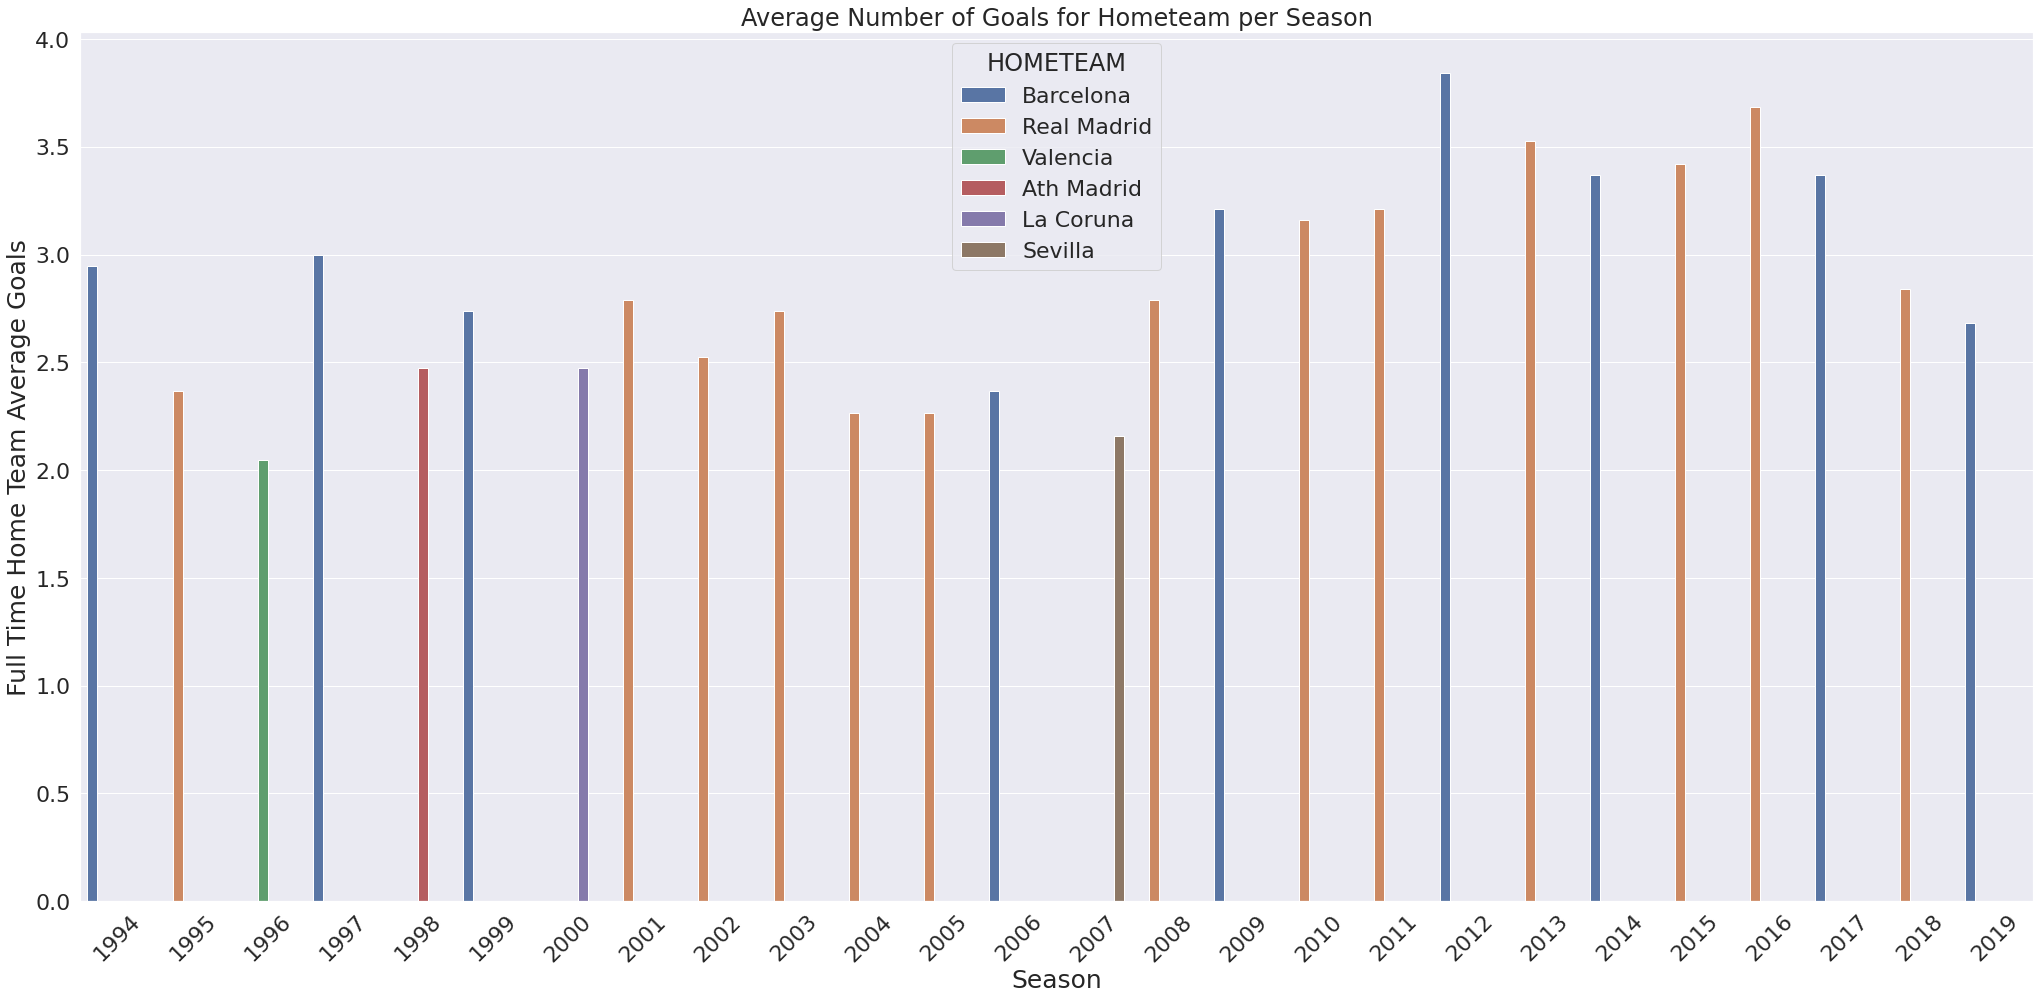

In [41]:
plt.figure(figsize=(35,16))
sns.barplot(x="SEASON", y="FTHG", hue="HOMETEAM", data=hometeam_average_ordered) 
plt.xlabel('Season',fontsize=25)
plt.ylabel('Full Time Home Team Average Goals',fontsize=25)
plt.title('Average Number of Goals for Hometeam per Season')
plt.xticks(rotation=45)
plt.show()

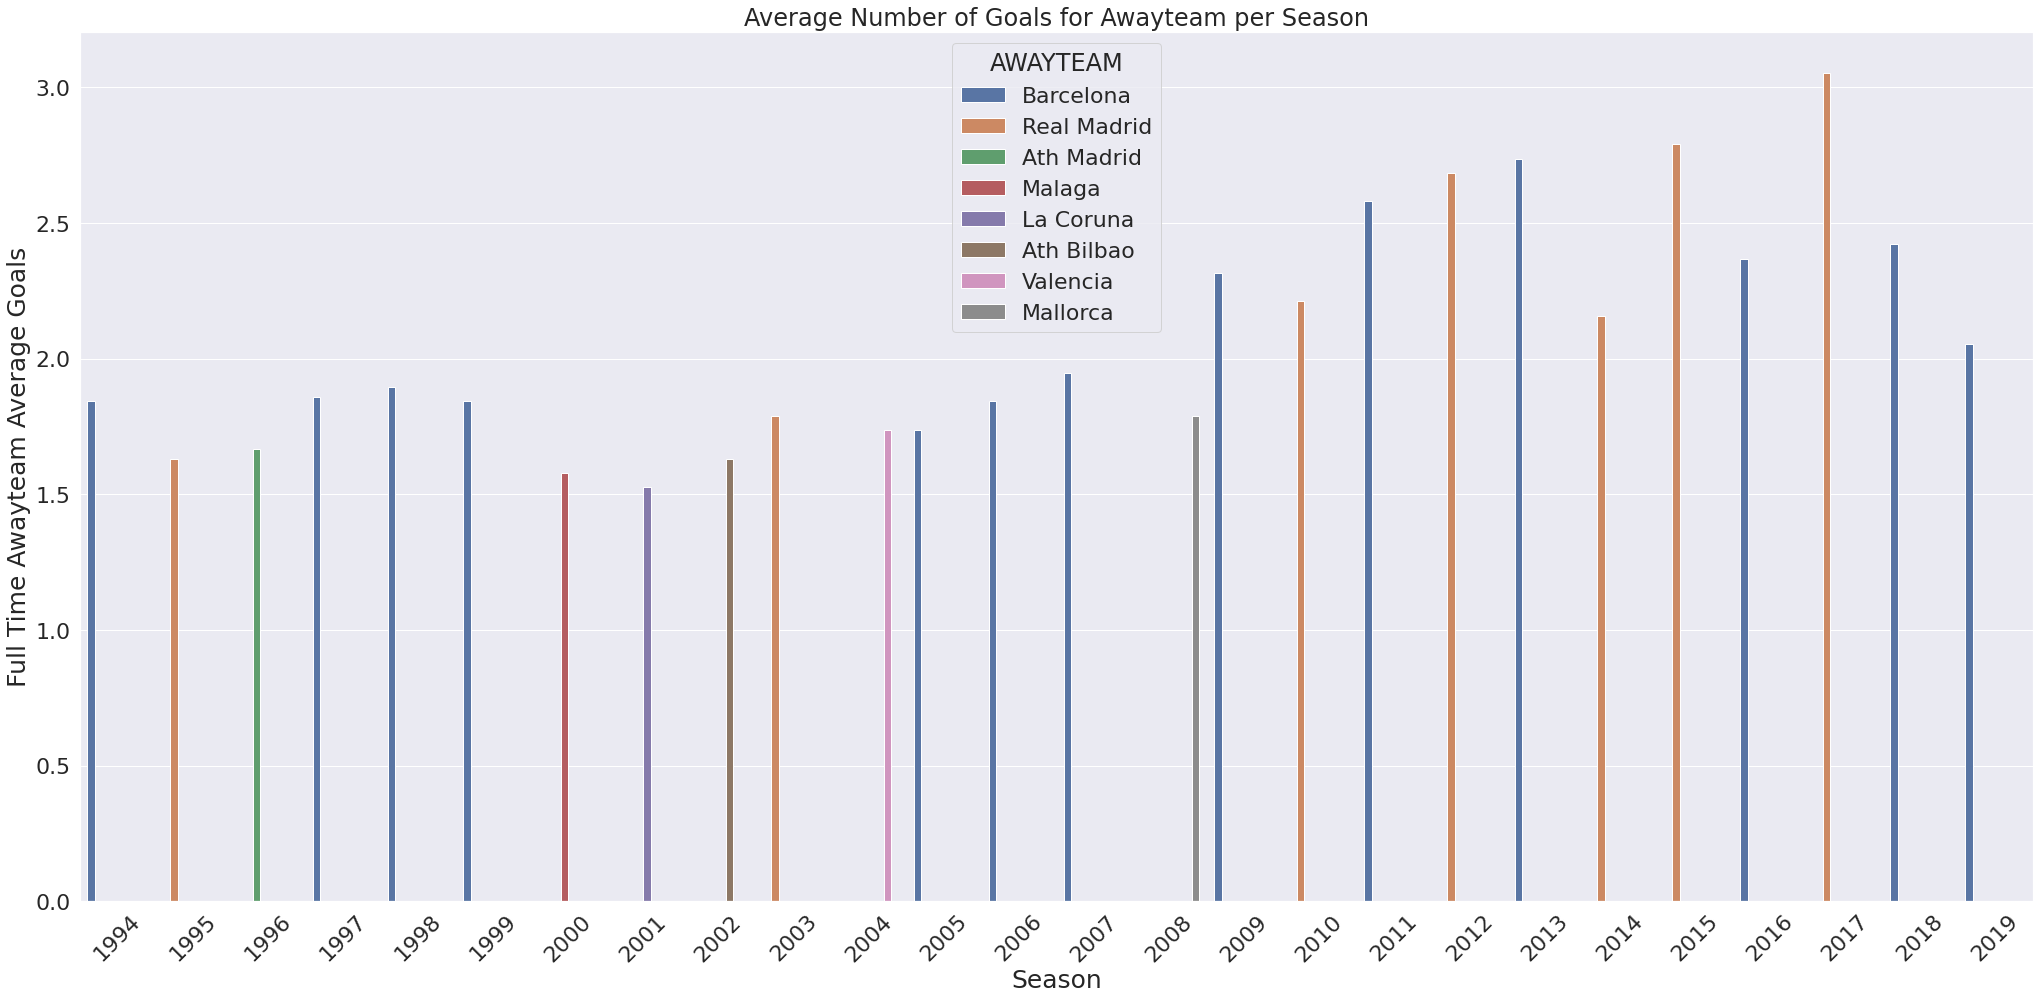

In [44]:
plt.figure(figsize=(35,16))
sns.barplot(x="SEASON", y="FTAG", hue="AWAYTEAM", data=awayteam_average_ordered) 
plt.xlabel('Season',fontsize=25)
plt.ylabel('Full Time Awayteam Average Goals',fontsize=25)
plt.title('Average Number of Goals for Awayteam per Season')
plt.xticks(rotation=45)
plt.show()

####Construct a plot to show how this number is changing over time. Hint: SEASON on x-axis. Show average Home goals and Away goals on the same plot. Be sure that your plot has appropriate axis names and titles.

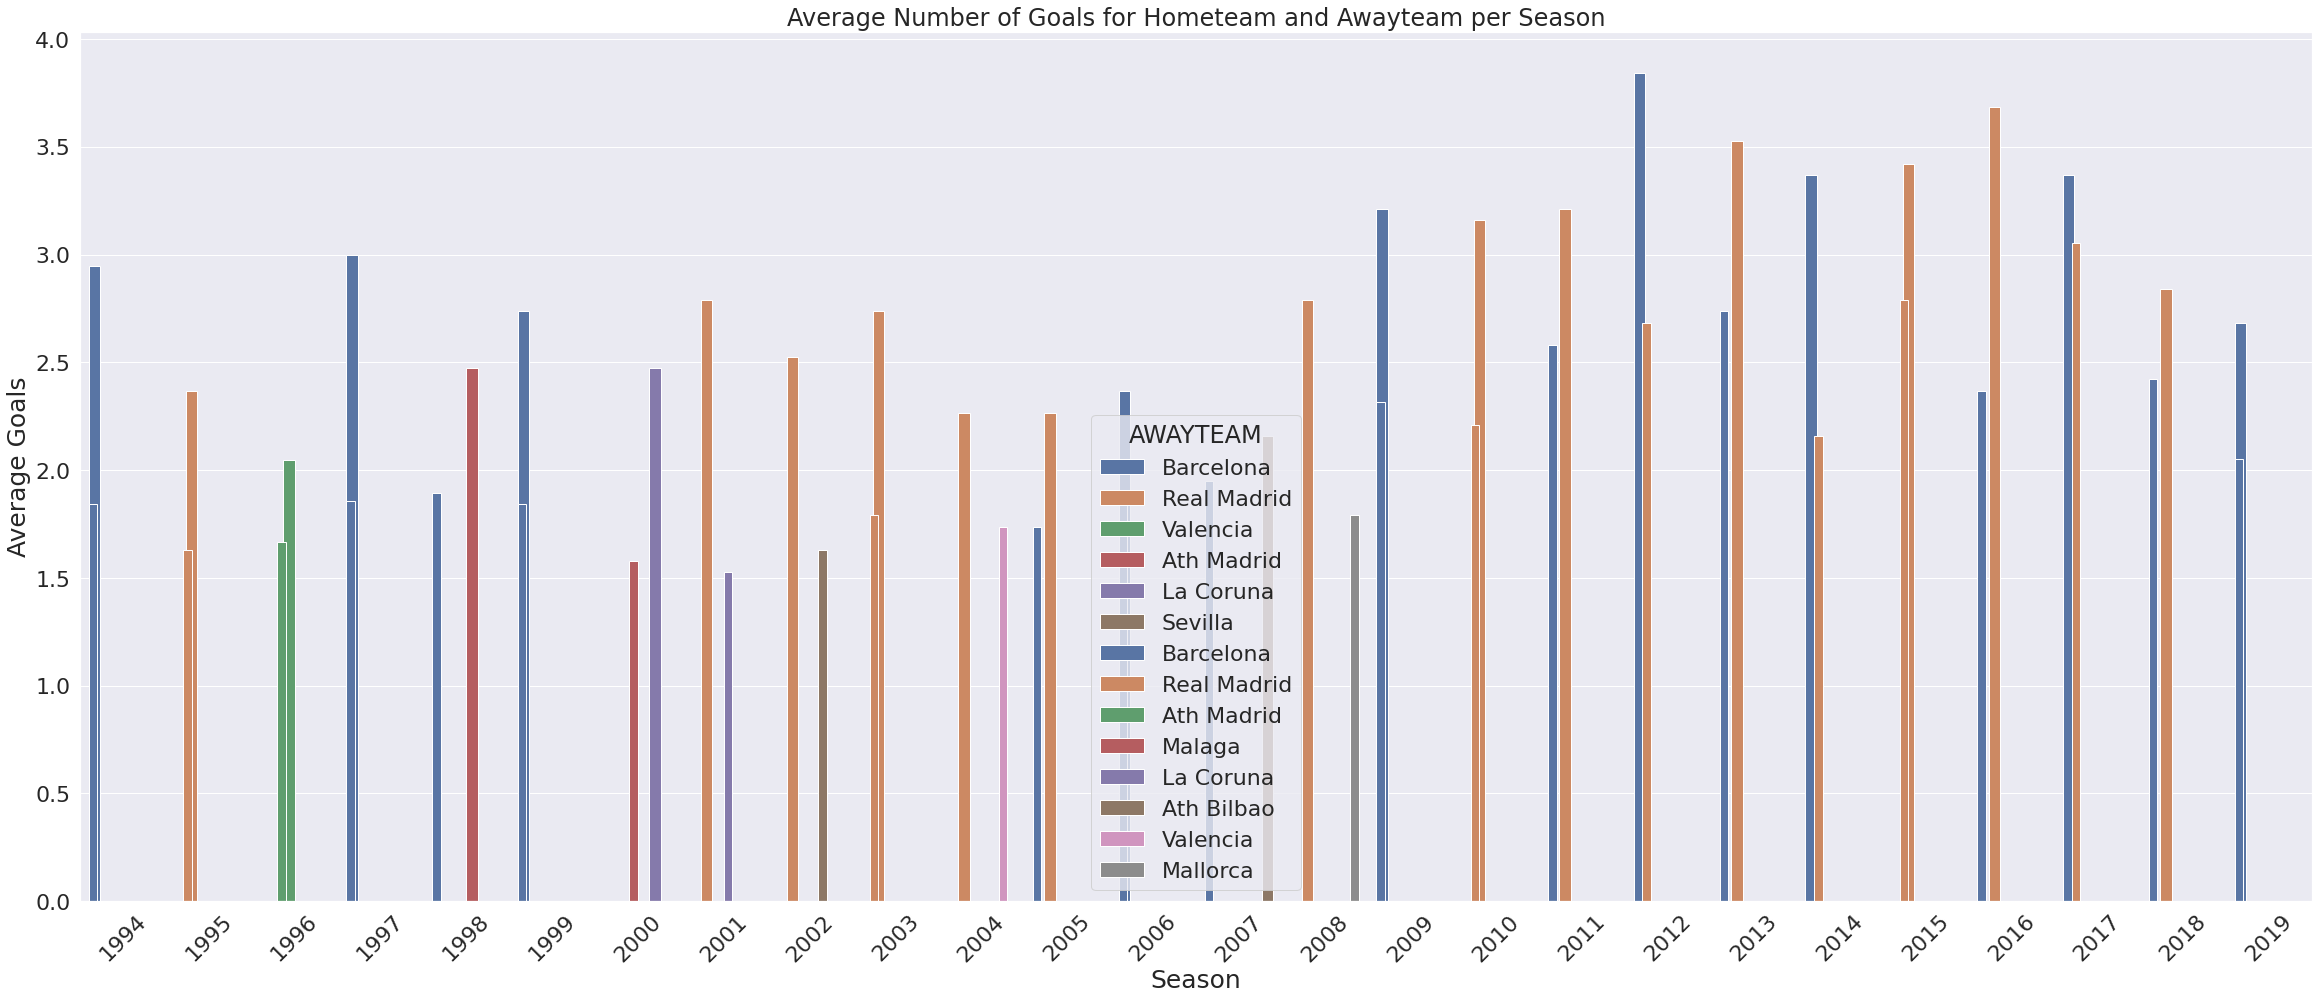

In [47]:
plt.figure(figsize=(40,16))
ax = sns.barplot(x="SEASON", y="FTHG", hue="HOMETEAM", data=hometeam_average_ordered) 
sns.barplot(x="SEASON", y="FTAG", hue="AWAYTEAM", data=awayteam_average_ordered, ax=ax) 
plt.xlabel('Season',fontsize=25)
plt.ylabel('Average Goals',fontsize=25)
plt.title('Average Number of Goals for Hometeam and Awayteam per Season')
plt.xticks(rotation=45)
plt.show()

####Find following clubs for each season: the best attack (top 5), the best defense (top5)